<a href="https://colab.research.google.com/github/raiutkarsh09/tensorflow-in-practice/blob/master/Men_vs_Women_Pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving cookies.txt to cookies.txt


{'cookies.txt': b'# HTTP Cookie File downloaded with cookies.txt by Genuinous @genuinous\n# This file can be used by wget, curl, aria2c and other standard compliant tools.\n# Usage Examples:\n#   1) wget -x --load-cookies cookies.txt "https://www.kaggle.com/playlist/men-women-classification"\n#   2) curl --cookie cookies.txt "https://www.kaggle.com/playlist/men-women-classification"\n#   3) aria2c --load-cookies cookies.txt "https://www.kaggle.com/playlist/men-women-classification"\n#\nwww.kaggle.com\tFALSE\t/signin-google\tTRUE\t1591477796\t.AspNetCore.Correlation.Google.Pv3kyPTbSNgdSKuQ0e2aNyQfziQl7YAINTL7t67jHws\tN\nwww.kaggle.com\tFALSE\t/signin-google\tTRUE\t1591477798\t.AspNetCore.Correlation.Google.k5VQuI_m4xBIbNUDPuFHx0kt9hY_PuYC4bEXuhHkeJg\tN\nwww.kaggle.com\tFALSE\t/\tFALSE\t1607064188\tka_sessionid\tce4549a4e11e5cbf6fbcc8215a2ff6c8\n.kaggle.com\tTRUE\t/\tFALSE\t1654415438\t_ga\tGA1.2.234384729.1591304859\n.kaggle.com\tTRUE\t/\tFALSE\t1591429838\t_gid\tGA1.2.1538988222.159130

In [0]:
!wget -x --load-cookies cookies.txt "https://www.kaggle.com/playlist/men-women-classification/download" -O /tmp/data.zip

--2020-06-05 07:51:28--  https://www.kaggle.com/playlist/men-women-classification/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-data-sets/160647%2F367971%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591602689&Signature=UL6GZA1XLNiJBrCUM0EhIymVNaOrsypFqUSRDQX4446aKL0HWmYLOLS6sMYbcaDFGJm72UzkMpT2cf2WspjvBMoN%2BtmljJuFRu5J22CQX1mFzJTdW6NFSwNmCQkbpbvDljhse%2BmNLjTC7yjikEz2WHHQIf37CJf9uvxRo0L19zjUUUhwjWD4DKd7FafRW8D32TwHr1h65fNpE2N9uQkkGu%2BK8LLqkOPLCpE0b%2B4HCVsSGeNHnXibXzH4h8KJsJ4TkW1A%2FF66z%2BO8BjLQX%2BLclZrw0kYuhaeXq3pxBJRQQk5uXSgrwD8A7o2Mjp9aakQe5sRwVLlpWEqX3XN0LXiS6w%3D%3D [following]
--2020-06-05 07:51:28--  https://storage.googleapis.com/kaggle-data-sets/160647%2F367971%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161

Extracting ZipFile 

In [0]:
import os
import zipfile
local_zip='/tmp/data.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/men-v-women')
zip_ref.close()

Size Of Data

In [0]:
print(len(os.listdir('/tmp/men-v-women/men/')))
print(len(os.listdir('/tmp/men-v-women/women/

1418
1912


Creating New Directories For Testing and Training

In [0]:
try:
  os.mkdir('/tmp/men-v-women/training')
  os.mkdir('/tmp/men-v-women/testing')
  os.mkdir('/tmp/men-v-women/training/men')
  os.mkdir('/tmp/men-v-women/training/women')
  os.mkdir('/tmp/men-v-women/testing/men')
  os.mkdir('/tmp/men-v-women/testing/women')

except OSError:
  pass

Splitting the data in Testing and training

In [0]:
import random
from shutil import copyfile


def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


MEN_SOURCE_DIR = "/tmp/men-v-women/men/"
TRAINING_MEN_DIR = "/tmp/men-v-women/training/men/"
TESTING_MEN_DIR = "/tmp/men-v-women/testing/men/"
WOMEN_SOURCE_DIR = "/tmp/men-v-women/women/"
TRAINING_WOMEN_DIR = "/tmp/men-v-women/training/women/"
TESTING_WOMEN_DIR = "/tmp/men-v-women/testing/women/"

split_size=0.9
split_data(MEN_SOURCE_DIR,TRAINING_MEN_DIR,TESTING_MEN_DIR,split_size)
split_data(WOMEN_SOURCE_DIR,TRAINING_WOMEN_DIR,TESTING_WOMEN_DIR,split_size)

In [0]:
print(len(os.listdir("/tmp/men-v-women/training/men/")))
print(len(os.listdir("/tmp/men-v-women/testing/men/")))
print(len(os.listdir("/tmp/men-v-women/training/women/")))
print(len(os.listdir("/tmp/men-v-women/testing/women/")))

1276
142
1720
192


Create the Model

In [0]:
import tensorflow as tf
from tensorflow import keras


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Compiling the Model

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

Creating Training and Testing Datagen

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir='/tmp/men-v-women/training'
test_dir='/tmp/men-v-women/testing'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=300, target_size=(300,300),class_mode='binary')
validation_data=test_datagen.flow_from_directory(test_dir,
                                                       target_size=(300,300),
                                                       batch_size=30,
                                                       class_mode='binary')

Found 2979 images belonging to 2 classes.
Found 331 images belonging to 2 classes.


In [0]:
history=model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=10,
    verbose=1,
    validation_data=validation_data,
    validation_steps=11
)

Epoch 1/50
10/10 [==============================] - 303s 30s/step - loss: 7.7776 - accuracy: 0.5341 - val_loss: 0.7432 - val_accuracy: 0.4424
Epoch 2/50
10/10 [==============================] - 297s 30s/step - loss: 0.6652 - accuracy: 0.6059 - val_loss: 0.6556 - val_accuracy: 0.5909
Epoch 3/50
10/10 [==============================] - 296s 30s/step - loss: 0.6588 - accuracy: 0.6042 - val_loss: 0.6566 - val_accuracy: 0.5939
Epoch 4/50
10/10 [==============================] - 295s 29s/step - loss: 0.6543 - accuracy: 0.6036 - val_loss: 0.6420 - val_accuracy: 0.6061
Epoch 5/50
10/10 [==============================] - 297s 30s/step - loss: 0.6770 - accuracy: 0.5817 - val_loss: 0.6452 - val_accuracy: 0.5879
Epoch 6/50
10/10 [==============================] - 298s 30s/step - loss: 0.6519 - accuracy: 0.6166 - val_loss: 0.6435 - val_accuracy: 0.6242
Epoch 7/50
10/10 [==============================] - 295s 30s/step - loss: 0.6684 - accuracy: 0.6042 - val_loss: 0.6662 - val_accuracy: 0.5758
Epoch 

Plotting the data

<Figure size 432x288 with 0 Axes>

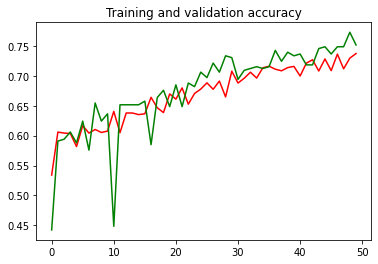

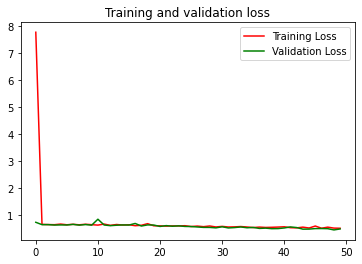

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch=range(len(acc))

plt.plot(epoch,acc,'r',label='Training Accuracy')
plt.plot(epoch,val_acc,'g',label='Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epoch,loss,'r',label='Training Loss')
plt.plot(epoch,val_loss,'g',label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

Try it out

In [0]:
from google.colab import files
import numpy as np
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a woman")
  else:
    print(fn + " is a man")


Saving 219_05_busbusiness_interviewHeader_1485x1254.jpg to 219_05_busbusiness_interviewHeader_1485x1254 (1).jpg
[0.]
219_05_busbusiness_interviewHeader_1485x1254.jpg is a man
